<a href="https://colab.research.google.com/github/shylesh-ai/Stock-LSTM/blob/main/LSTM%2CLINEAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd


In [ ]:
train=pd.read_csv('/content/drive/My Drive/data science/data science1/trainset.csv')

FileNotFoundError: ignored

In [7]:
from google.colab import drive

In [8]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
train=pd.read_csv('/content/drive/My Drive/data science/data science1/trainset.csv')

In [ ]:
trainset = train.iloc[:,1:2].values
trainset


array([[ 357.385559],
       [ 360.122742],
       [ 362.313507],
       ...,
       [1057.390015],
       [1051.599976],
       [1046.719971]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)
training_scaled

array([[0.01011148],
       [0.01388614],
       [0.01690727],
       ...,
       [0.97543954],
       [0.9674549 ],
       [0.96072522]])

In [ ]:
x_train = []
y_train = []
for i in range(60,1259):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i-60:i,0])
x_train,y_train = np.array(x_train),np.array(y_train)
x_train.shape

(1199, 60)

In [ ]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt

In [ ]:
x_train = []
y_train = []
for i in range(60,1259):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i-60:i,0])
x_train,y_train = np.array(x_train),np.array(y_train)
x_train.shape
y_train.shape

(1199, 60)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
print(x_train)

[[[0.01011148]
  [0.01388614]
  [0.01690727]
  ...
  [0.07456192]
  [0.0698898 ]
  [0.068047  ]]

 [[0.01388614]
  [0.01690727]
  [0.02109298]
  ...
  [0.0698898 ]
  [0.068047  ]
  [0.06189514]]

 [[0.01690727]
  [0.02109298]
  [0.02115463]
  ...
  [0.068047  ]
  [0.06189514]
  [0.06842378]]

 ...

 [[0.84110805]
  [0.83286147]
  [0.83699857]
  ...
  [0.98586493]
  [0.9805695 ]
  [0.97637719]]

 [[0.83286147]
  [0.83699857]
  [0.83491622]
  ...
  [0.9805695 ]
  [0.97637719]
  [0.97543954]]

 [[0.83699857]
  [0.83491622]
  [0.85037519]
  ...
  [0.97637719]
  [0.97543954]
  [0.9674549 ]]]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor = Sequential()

In [ ]:
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))

In [ ]:
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')
regressor.fit(x_train,y_train,epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 10s 106ms/step - loss: 0.0705
Epoch 2/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0049
Epoch 3/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0043
Epoch 4/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0036
Epoch 5/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0041
Epoch 6/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0033
Epoch 7/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0032
Epoch 8/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0031
Epoch 9/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0033
Epoch 10/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0031
Epoch 11/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0032
Epoch 12/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0033
Epoch 13/100

In [ ]:
test =pd.read_csv("/content/drive/My Drive/data science/data science1/testset.csv")


In [ ]:
real_stock_price = test.iloc[:,1:2].values
dataset_total = pd.concat((train['Open'],test['Open']),axis = 0)
dataset_total

0       357.385559
1       360.122742
2       362.313507
3       365.348755
4       365.393463
          ...     
120    1143.599976
121    1128.000000
122    1121.339966
123    1102.089966
124    1120.000000
Name: Open, Length: 1384, dtype: float64

In [ ]:
inputs = dataset_total[len(dataset_total) - len(test)-60:].values
inputs


array([ 955.48999 ,  966.700012,  980.      ,  980.      ,  973.719971,
        987.450012,  992.      ,  992.099976,  990.289978,  991.77002 ,
        986.      ,  989.440002,  989.52002 ,  970.      ,  968.369995,
        980.      , 1009.190002, 1014.      , 1015.219971, 1017.210022,
       1021.76001 , 1022.109985, 1028.98999 , 1027.27002 , 1030.52002 ,
       1033.98999 , 1026.459961, 1023.419983, 1022.590027, 1019.210022,
       1022.52002 , 1034.01001 , 1020.26001 , 1023.309998, 1035.      ,
       1035.869995, 1040.      , 1055.089966, 1042.680054, 1022.369995,
       1015.799988, 1012.659973,  995.940002, 1001.5     , 1020.429993,
       1037.48999 , 1035.5     , 1039.630005, 1046.119995, 1045.      ,
       1054.609985, 1066.079956, 1075.199951, 1071.780029, 1064.949951,
       1061.109985, 1058.069946, 1057.390015, 1051.599976, 1046.719971,
       1048.339966, 1064.310059, 1088.      , 1094.      , 1102.22998 ,
       1109.400024, 1097.099976, 1106.300049, 1102.410034, 1132.

In [ ]:
inputs = inputs.reshape(-1,1)
inputs


array([[ 955.48999 ],
       [ 966.700012],
       [ 980.      ],
       [ 980.      ],
       [ 973.719971],
       [ 987.450012],
       [ 992.      ],
       [ 992.099976],
       [ 990.289978],
       [ 991.77002 ],
       [ 986.      ],
       [ 989.440002],
       [ 989.52002 ],
       [ 970.      ],
       [ 968.369995],
       [ 980.      ],
       [1009.190002],
       [1014.      ],
       [1015.219971],
       [1017.210022],
       [1021.76001 ],
       [1022.109985],
       [1028.98999 ],
       [1027.27002 ],
       [1030.52002 ],
       [1033.98999 ],
       [1026.459961],
       [1023.419983],
       [1022.590027],
       [1019.210022],
       [1022.52002 ],
       [1034.01001 ],
       [1020.26001 ],
       [1023.309998],
       [1035.      ],
       [1035.869995],
       [1040.      ],
       [1055.089966],
       [1042.680054],
       [1022.369995],
       [1015.799988],
       [1012.659973],
       [ 995.940002],
       [1001.5     ],
       [1020.429993],
       [10

In [ ]:
inputs = sc.transform(inputs)
inputs.shape

(185, 1)

In [ ]:
x_test = []
for i in range(60,185):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test.shape

(125, 60)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape


(125, 60, 1)

In [ ]:
predicted_price = regressor.predict(x_test)
predicted_price = sc.inverse_transform(predicted_price)
predicted_price

array([[1044.9442],
       [1043.874 ],
       [1046.1395],
       [1053.9402],
       [1064.0831],
       [1073.4985],
       [1080.813 ],
       [1083.2747],
       [1083.779 ],
       [1083.4285],
       [1087.9077],
       [1094.223 ],
       [1100.3903],
       [1104.9938],
       [1108.6654],
       [1114.8881],
       [1124.4951],
       [1133.0165],
       [1138.7792],
       [1142.0935],
       [1142.5922],
       [1142.398 ],
       [1141.5216],
       [1134.8595],
       [1121.6904],
       [1099.104 ],
       [1083.9688],
       [1076.1085],
       [1067.6931],
       [1063.1736],
       [1061.795 ],
       [1062.058 ],
       [1066.617 ],
       [1073.5938],
       [1079.359 ],
       [1084.3442],
       [1089.0544],
       [1091.9135],
       [1095.212 ],
       [1100.6471],
       [1103.6019],
       [1101.7322],
       [1089.5948],
       [1077.4963],
       [1074.3766],
       [1077.23  ],
       [1085.6841],
       [1097.9248],
       [1112.827 ],
       [1125.8748],


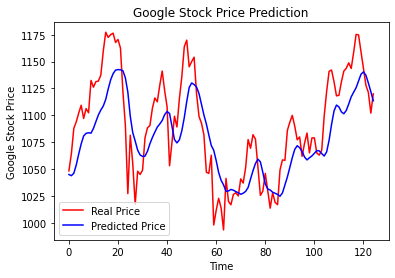

In [ ]:
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [ ]:
from pyramid.arima import auto_arima

ModuleNotFoundError: ignored

In [ ]:
import keras
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.optimizers import Adam
import math
import numpy as np
import random
from collections import deque

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

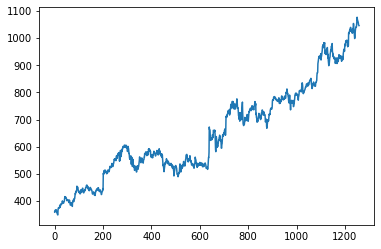

In [ ]:
train['Close'].plot()

In [ ]:
train = train.reset_index()

In [ ]:
x = np.array(train.index).reshape(-1, 1)
y = train['Close']

In [ ]:
linreg = LinearRegression().fit(x, y)
linreg.score(x, y)
predictions = linreg.predict(x)

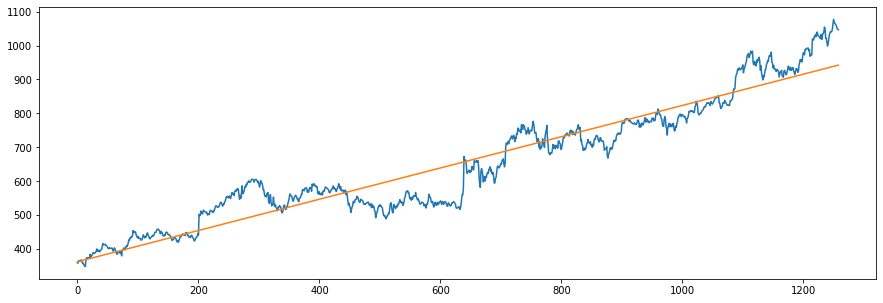

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(train['Close'])
plt.plot(train.index, predictions)

In [ ]:
print( linreg.score(x, y))


0.9067467510011854


In [ ]:
from pyramid.arima import auto_arima

ModuleNotFoundError: ignored

In [ ]:
clf = RandomForestClassifier(random_state=5)

In [ ]:
model = clf.fit(x_train, y_train)

ValueError: ignored

In [ ]:
rand_frst_clf = RandomForestClassifier(n_estimators = 100, oob_score = True, criterion = "gini", random_state = 0)

In [ ]:
rand_frst_clf.fit(x_train, y_train)


ValueError: ignored

In [ ]:
regression_model = LinearRegression()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(5)

In [ ]:
X_transform = poly.fit_transform(x.reshape(-1, 1))


In [ ]:
regression_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

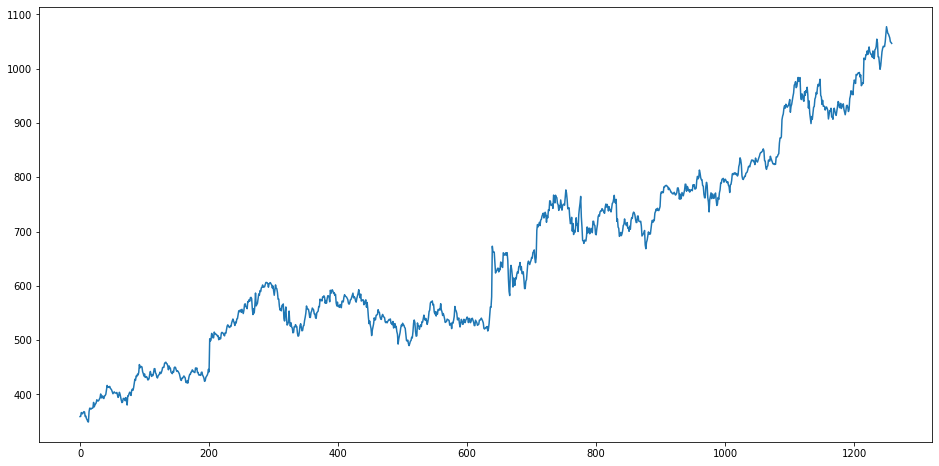

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(x,train['Close'], label='Close Price History')


In [ ]:
data = train.filter(['Close'])

In [ ]:
dataset = data.values


In [ ]:
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1197

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01390725],
       [0.01419387],
       [0.02395214],
       ...,
       [0.96185311],
       [0.96016352],
       [0.95777334]])

In [ ]:
train_data = scaled_data[0:int(training_data_len), :]

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1199/1199 [==============================] - 37s 29ms/step - loss: 0.0078


In [ ]:
test_data = scaled_data[training_data_len - 60: , :]

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))


In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

ValueError: ignored

In [ ]:
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

AttributeError: ignored

In [ ]:
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [ ]:
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))


In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

73.18203240606795

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


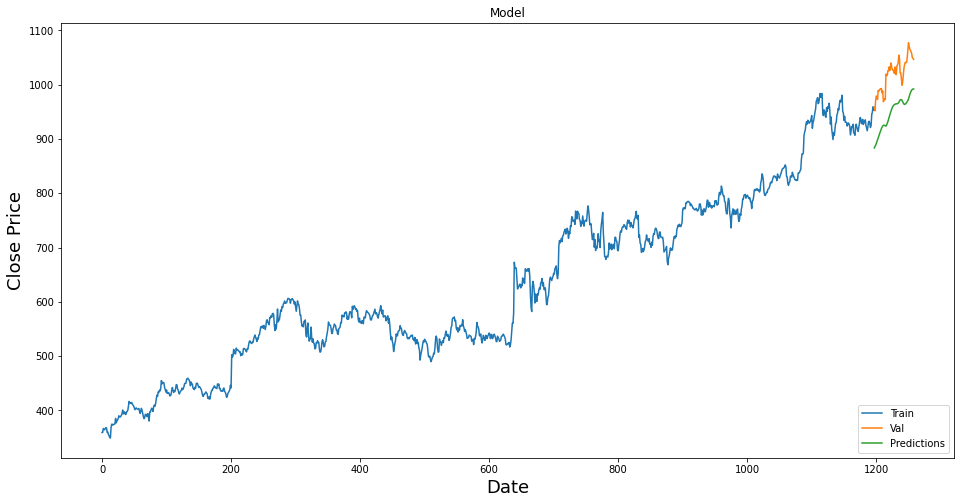

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [ ]:
y=train['Close']

In [ ]:
y

0        359.288177
1        359.496826
2        366.600616
3        365.001007
4        364.280701
           ...     
1254    1060.119995
1255    1056.739990
1256    1049.369995
1257    1048.140015
1258    1046.400024
Name: Close, Length: 1259, dtype: float64

In [ ]:
X=train['High']

In [ ]:
X


0        361.151062
1        363.600128
2        368.339294
3        367.301056
4        365.771027
           ...     
1254    1064.199951
1255    1060.119995
1256    1058.369995
1257    1054.750000
1258    1049.699951
Name: High, Length: 1259, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)
training_scaled

array([[0.01011148],
       [0.01388614],
       [0.01690727],
       ...,
       [0.97543954],
       [0.9674549 ],
       [0.96072522]])

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [ ]:
model = LogisticRegression()
model = model.fit (x2,y2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: ignored

In [ ]:
x2=X.values.reshape(-1,1)

In [ ]:
split = int(0.7*len(train))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
x_train=X_train.values.reshape(-1,1)
y_train=y_train.values.reshape(-1,1)

In [ ]:
model = LogisticRegression()
model = model.fit (x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: ignored

In [10]:
train.corr()


,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999704,0.999545,0.999242,0.999242,-0.472684
High,0.999704,1.000000,0.999520,0.999601,0.999601,-0.468378
Low,0.999545,0.999520,1.000000,0.999710,0.999710,-0.478572
Close,0.999242,0.999601,0.999710,1.000000,1.000000,-0.474131
Adj Close,0.999242,0.999601,0.999710,1.000000,1.000000,-0.474131
Volume,-0.472684,-0.468378,-0.478572,-0.474131,-0.474131,1.000000
